# Mutant MoneyBall Cleaning and Analysis

## Introduction
This project follows the principles of Tidy Data, as outlined by Hadley Wickham, to transform and visualize data effectively. According to the **Tidy Data Principles**, each dataset should be structured so that:
1. Each variable forms a column.
2. Each observation forms a row.
3. Each type of observational unit forms its own table.

By ensuring data is tidy, we make it easier to manipulate, visualize, and analyze using Pandas and other data science tools.

Below is data used in Rally's Mutant Moneyball article which visualizes X-Men value data, era by era, from the X-Men's creation in 1963 up to 1993.

In [35]:
# import neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import dataframe
df_moneyball = pd.read_csv("mutant_moneyball.csv")
df_moneyball

,Member,TotalValue60s_heritage,TotalValue70s_heritage,TotalValue80s_heritage,TotalValue90s_heritage,TotalValue60s_ebay,TotalValue70s_ebay,TotalValue80s_ebay,TotalValue90s_ebay,TotalValue60s_wiz,TotalValue70s_wiz,TotalValue80s_wiz,TotalValue90s_wiz,TotalValue60s_oStreet,TotalValue70s_oStreet,TotalValue80s_oStreet,TotalValue90s_oStreet
0,warrenWorthington,929056.0,154585.0,23957.0,960.0,23335.0,3362.0,583.0,97.0,"$7,913.00","$1,105.00",$226.00,$65.75,"$68,160.00","$7,360.00",$975.00,$123.00
1,hankMcCoy,929776.0,20705.0,6631.0,881.0,23377.0,1224.0,289.0,82.0,"$7,953.00",$851.00,$89.00,$38.50,"$68,390.00","$5,260.00",$431.00,$81.00
2,scottSummers,933616.0,188635.0,29240.0,739.0,23420.0,5431.0,1031.0,82.0,"$7,993.00","$1,979.00",$438.00,$39.25,"$68,590.00","$11,675.00","$1,427.00",$74.00
3,bobbyDrake,929776.0,154585.0,1514.0,874.0,23377.0,3362.0,70.0,93.0,"$7,953.00","$1,105.00",$48.00,$62.00,"$68,390.00","$7,360.00",$137.00,$108.00
4,jeanGrey,933616.0,179899.0,16868.0,1708.0,23420.0,4903.0,665.0,170.0,"$7,993.00","$1,679.00",$165.00,$108.00,"$68,590.00","$10,265.00",$822.00,$189.00
5,alexSummers,34519.0,144946.0,9352.0,197.0,745.0,2703.0,581.0,21.0,$342.00,$597.00,$253.00,$19.00,"$1,850.00","$3,865.00",$502.00,$24.00
6,lornaDane,76279.0,144946.0,6602.0,731.0,1212.0,2703.0,405.0,41.0,$374.00,$597.00,$116.00,$43.00,"$2,000.00","$3,865.00",$293.00,$44.00
7,ororoMunroe,NaN,171050.0,54205.0,2183.0,NaN,4349.0,1730.0,334.0,NaN,"$1,224.00",$931.00,$158.00,NaN,"$6,890.00","$2,391.00",$273.00
8,kurtWagner,NaN,171050.0,50666.0,NaN,NaN,4349.0,1345.0,NaN,NaN,"$1,224.00",$736.00,NaN,NaN,"$6,890.00","$2,044.00",NaN
9,loganHowlett,NaN,171050.0,52524.0,1079.0,NaN,4349.0,1669.0,100.0,NaN,"$1,224.00",$908.00,$111.00,NaN,"$6,890.00","$2,310.00",$119.00


## Step 1: Cleaning Data
Before analysis, we need to clean the dataset to ensure consistency and usability. This involves:
- **Selecting columns to process**: We exclude the `Member` column since it contains categorical data.
- **Removing unwanted characters**: We use `.str.replace` to remove dollar signs and commas so that numerical values can be processed correctly.
- **Trimming whitespace**: We apply `.str.strip()` to eliminate any leading or trailing spaces in numerical columns.
- **Handling missing values**: Empty strings are converted to `NaN` using `.replace('', np.nan)`, ensuring they are recognized as missing values.
- **Converting data types**: We use `.astype(float)` to convert the cleaned values into a numerical format for calculations.
- **Formatting output for display**: If the values need to be displayed (rather than calculated), we use the `apply` function to format them as currency.

In [36]:
# Columns to process (everything except 'Member')
value_columns = [col for col in df_moneyball.columns if col != 'Member']

# Clean and convert to numeric (remove $ and commas, convert to float)
for col in value_columns:
    df_moneyball[col] = (
        df_moneyball[col]
        .astype(str)  # Ensure string to apply string methods
        .str.replace('[$,]', '', regex=True)  # Remove $ and commas
        .str.strip()  # Remove spaces if any
        .replace('', np.nan)  # Turn blanks into proper NaN
        .astype(float)  # Convert to float for calculations
    )

# Format as "$x,xxx.xx" (only for display)
for col in value_columns:
    df_moneyball[col] = df_moneyball[col].apply(lambda x: f'${x:,.2f}' if pd.notna(x) else '')

# Check result
df_moneyball

,Member,TotalValue60s_heritage,TotalValue70s_heritage,TotalValue80s_heritage,TotalValue90s_heritage,TotalValue60s_ebay,TotalValue70s_ebay,TotalValue80s_ebay,TotalValue90s_ebay,TotalValue60s_wiz,TotalValue70s_wiz,TotalValue80s_wiz,TotalValue90s_wiz,TotalValue60s_oStreet,TotalValue70s_oStreet,TotalValue80s_oStreet,TotalValue90s_oStreet
0,warrenWorthington,"$929,056.00","$154,585.00","$23,957.00",$960.00,"$23,335.00","$3,362.00",$583.00,$97.00,"$7,913.00","$1,105.00",$226.00,$65.75,"$68,160.00","$7,360.00",$975.00,$123.00
1,hankMcCoy,"$929,776.00","$20,705.00","$6,631.00",$881.00,"$23,377.00","$1,224.00",$289.00,$82.00,"$7,953.00",$851.00,$89.00,$38.50,"$68,390.00","$5,260.00",$431.00,$81.00
2,scottSummers,"$933,616.00","$188,635.00","$29,240.00",$739.00,"$23,420.00","$5,431.00","$1,031.00",$82.00,"$7,993.00","$1,979.00",$438.00,$39.25,"$68,590.00","$11,675.00","$1,427.00",$74.00
3,bobbyDrake,"$929,776.00","$154,585.00","$1,514.00",$874.00,"$23,377.00","$3,362.00",$70.00,$93.00,"$7,953.00","$1,105.00",$48.00,$62.00,"$68,390.00","$7,360.00",$137.00,$108.00
4,jeanGrey,"$933,616.00","$179,899.00","$16,868.00","$1,708.00","$23,420.00","$4,903.00",$665.00,$170.00,"$7,993.00","$1,679.00",$165.00,$108.00,"$68,590.00","$10,265.00",$822.00,$189.00
5,alexSummers,"$34,519.00","$144,946.00","$9,352.00",$197.00,$745.00,"$2,703.00",$581.00,$21.00,$342.00,$597.00,$253.00,$19.00,"$1,850.00","$3,865.00",$502.00,$24.00
6,lornaDane,"$76,279.00","$144,946.00","$6,602.00",$731.00,"$1,212.00","$2,703.00",$405.00,$41.00,$374.00,$597.00,$116.00,$43.00,"$2,000.00","$3,865.00",$293.00,$44.00
7,ororoMunroe,,"$171,050.00","$54,205.00","$2,183.00",,"$4,349.00","$1,730.00",$334.00,,"$1,224.00",$931.00,$158.00,,"$6,890.00","$2,391.00",$273.00
8,kurtWagner,,"$171,050.00","$50,666.00",,,"$4,349.00","$1,345.00",,,"$1,224.00",$736.00,,,"$6,890.00","$2,044.00",
9,loganHowlett,,"$171,050.00","$52,524.00","$1,079.00",,"$4,349.00","$1,669.00",$100.00,,"$1,224.00",$908.00,$111.00,,"$6,890.00","$2,310.00",$119.00


## Step 2: Transforming Data to a Tidy Format
In many datasets, information is stored in a wide format, where multiple variables are combined into one column or spread across multiple columns. To address this, we:
- Use `pd.melt()` to gather data into a long format, ensuring each variable has its own column.
- Apply `.str.split()` to separate combined values into distinct columns (e.g., splitting a column like `TotalValue60s_heritage` into `Decade` and `Source`).
- Ensure that each observation is stored in its own row, which follows **Tidy Data Principles**.


In [37]:
df_moneyball_melted = pd.melt(
    df_moneyball,
    id_vars=["Member"],
    value_vars=[
        "TotalValue60s_heritage", "TotalValue70s_heritage", "TotalValue80s_heritage", "TotalValue90s_heritage",
        "TotalValue60s_ebay", "TotalValue70s_ebay", "TotalValue80s_ebay", "TotalValue90s_ebay",
        "TotalValue60s_wiz", "TotalValue70s_wiz", "TotalValue80s_wiz", "TotalValue90s_wiz",
        "TotalValue60s_oStreet", "TotalValue70s_oStreet", "TotalValue80s_oStreet", "TotalValue90s_oStreet"
    ],
    var_name="Attribute",
    value_name="Total Value"
)

# Split 'Attribute' into 'Decade' and 'Source'
df_moneyball_melted[['Decade', 'Source']] = df_moneyball_melted['Attribute'].str.split('_', expand=True).iloc[:, 
                    [0, 1]].replace({'TotalValue': ''}, regex=True)

# Drop old 'Attribute' column
df_moneyball_melted = df_moneyball_melted.drop(columns=['Attribute'])

# Reorder columns (optional)
df_moneyball_melted = df_moneyball_melted[['Member', 'Decade', 'Source', 'Total Value']]

print("\nMelted (Tidy) Moneyball Dataframe with Decade and Source:")
df_moneyball_melted   


Melted (Tidy) Moneyball Dataframe with Decade and Source:


,Member,Decade,Source,Total Value
0,warrenWorthington,60s,heritage,"$929,056.00"
1,hankMcCoy,60s,heritage,"$929,776.00"
2,scottSummers,60s,heritage,"$933,616.00"
3,bobbyDrake,60s,heritage,"$929,776.00"
4,jeanGrey,60s,heritage,"$933,616.00"
...,...,...,...,...
411,remyLeBeau,90s,oStreet,$188.00
412,jubilationLee,90s,oStreet,$126.00
413,lucasBishop,90s,oStreet,$80.00
414,betsyBraddock,90s,oStreet,$109.00


## Step 3: Creating Pivot Tables for Aggregation
Pivot tables allow us to summarize and restructure data for better insights. We create two key pivot tables:


### Pivot Table 1: Average Total Value by Member and Source
To analyze how members' valuations vary across different sources, we:
- Use `df.pivot` to reshape the data.
- Fill missing values with `fillna(0)` to ensure proper numerical calculations.
- Use `aggfunc` to average the values across the sources

In [38]:
# Strip formatting so Total Value is numeric again
df_moneyball_melted['Total Value'] = (
    df_moneyball_melted['Total Value']
    .astype(str)  # Ensure it's a string before using .str accessor
    .str.replace('[$,]', '', regex=True)  # Remove $ and comma
    .replace('', np.nan)  # Convert blanks to NaN (optional)
    .astype(float)  # Now it's safe to convert back to float
)

# Create pivot table averaging across decades
df_moneyball_decade = pd.pivot_table(
    df_moneyball_melted, 
    values='Total Value', 
    index='Member', 
    columns='Decade', 
    aggfunc='mean'
)

# Fill missing decades with 0
df_moneyball_decade = df_moneyball_decade.fillna(0)

# Format the 'Total Value' columns to display as $x,xxx.xx and replace 0.00 with a blank
df_moneyball_decade = df_moneyball_decade.map(
    lambda x: f"${x:,.2f}" if x != 0 else ''  # Format non-zero values and replace 0.00 with an empty string
)

# Final output
print("\nPivoted Decades DataFrame (averaged across sources):")
df_moneyball_decade


Pivoted Decades DataFrame (averaged across sources):


Decade,60s,70s,80s,90s
Member,,,,
alexSummers,"$9,364.00","$38,027.75","$2,672.00",$65.25
alisonBlaire,,,"$2,150.75",$25.25
annaMarieLeBeau,,,"$3,164.50",$142.50
betsyBraddock,,,"$1,711.75",$335.00
bobbyDrake,"$257,374.00","$41,603.00",$442.25,$284.25
charlesXavier,"$227,714.00","$45,327.50","$11,375.50",$335.50
ericMagnus,"$162,162.75","$1,180.00","$4,364.25",$69.50
hankMcCoy,"$257,374.00","$7,010.00","$1,860.00",$270.62
jeanGrey,"$258,404.75","$49,186.50","$4,630.00",$543.75


### Pivot Table 2: Average Total Value by Member and Decade
To observe valuation trends over time, we:
- Use `df.pivot` to organize data by decade.
- Apply `fillna(0)` to handle missing values.
- Use `aggfunc` to average the values across the sources

In [39]:
# Strip formatting so Total Value is numeric again
df_moneyball_melted['Total Value'] = (
    df_moneyball_melted['Total Value']
    .astype(str)  # Ensure it's a string
    .str.replace('[$,]', '', regex=True)  # Remove $ and comma
    .replace('', np.nan)  # Convert blanks to NaN (optional)
    .astype(float)  # Now it's safe to convert back to float
)

# Create pivot table averaging across sources
df_moneyball_source = pd.pivot_table(
    df_moneyball_melted, 
    values='Total Value', 
    index='Member', 
    columns='Source', 
    aggfunc='mean'
)

# Fill missing sources with 0
df_moneyball_source = df_moneyball_source.fillna(0)

# Format the 'Total Value' columns to display as $x,xxx.xx and replace 0.00 with a blank
df_moneyball_source = df_moneyball_source.map(
    lambda x: f"${x:,.2f}" if x != 0 else ''  # Format non-zero values and replace 0.00 with an empty string
)

# Final output
print("\nPivoted Source DataFrame (averaged across sources):")
df_moneyball_source


Pivoted Source DataFrame (averaged across sources):


Source,ebay,heritage,oStreet,wiz
Member,,,,
alexSummers,"$1,012.50","$47,253.50","$1,560.25",$302.75
alisonBlaire,$279.00,"$3,634.00",$290.50,$148.50
annaMarieLeBeau,$312.00,"$5,594.00",$441.50,$266.50
betsyBraddock,$292.50,"$3,301.50",$288.50,$211.00
bobbyDrake,"$6,725.50","$271,687.25","$18,998.75","$2,292.00"
charlesXavier,"$6,710.75","$257,274.75","$18,509.50","$2,257.50"
ericMagnus,"$4,102.50","$150,832.00","$11,704.25","$1,137.75"
hankMcCoy,"$6,243.00","$239,498.25","$18,540.50","$2,232.88"
jeanGrey,"$7,289.50","$283,022.75","$19,966.50","$2,486.25"


## Step 4: Visualization
Visualizing the data helps identify patterns and trends that might not be apparent in raw numbers. Below are key visualizations that provide insights:

### 1. Line Chart: Total Value Over Time
- **Purpose**: This line chart shows the trend of total values over time, categorized by different sources, and helps us determine which decade has the most valuable X-Men. Each line represents the range of values for each decade. 
- **Interpretation**: The values are shown to increase overtime, with X-Men from the 60s being the most valuable by far, indicating the comics are appreciating. 

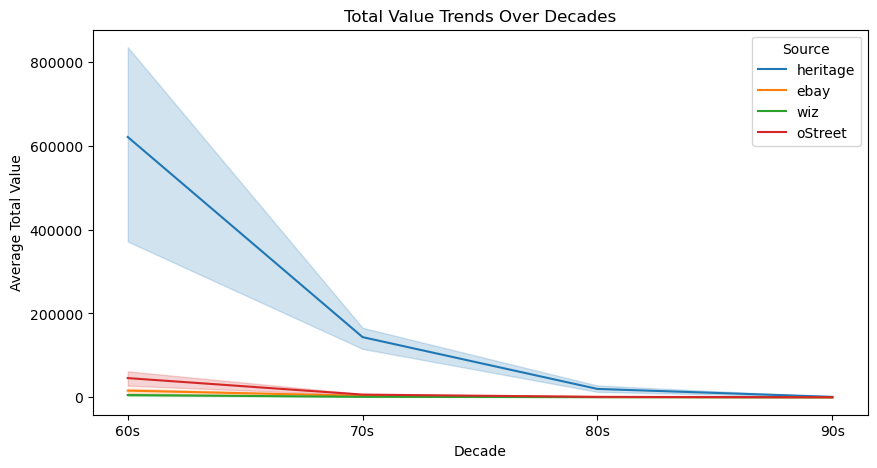

In [40]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_moneyball_melted, x='Decade', y='Total Value', hue='Source', estimator='mean')
plt.title("Total Value Trends Over Decades")
plt.ylabel("Average Total Value")
plt.xlabel("Decade")
plt.legend(title="Source")
plt.show()

### Total Value by Source Over Decades
This stacked bar chart helps compare how different sources contribute to the total valuation over time.
It allows us to see whether some sources have become more dominant in later decades or if valuation distribution has remained stable.

### 2. Stacked Bar Chart: Comparing Sources Over Time
- **Purpose**: This stacked bar chart helps compare how different sources contribute to the total valuation over time. It allows us to see whether some sources have become more dominant for later editions or if valuation distribution has remains stable.
- **Interpretation**: Heritage remains the dominant source in every decade, with it appearing to become more dominant in the later decades than the earlier ones. The 60s still remains the most valuable source by far

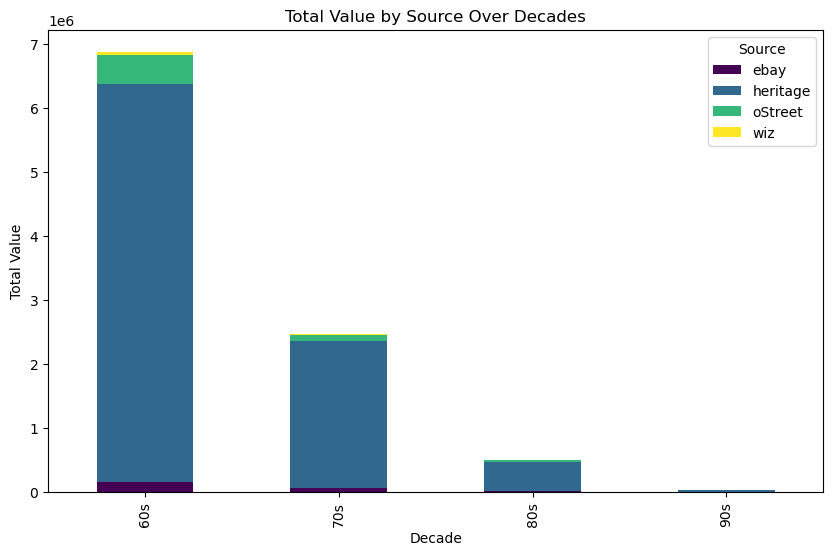

In [41]:
df_pivot = df_moneyball_melted.pivot_table(values='Total Value', index='Decade', columns='Source', aggfunc='sum')
df_pivot.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title("Total Value by Source Over Decades")
plt.ylabel("Total Value")
plt.xlabel("Decade")
plt.legend(title="Source")
plt.show()


### 3. Boxplot: Distribution of Total Value by Source
- **Purpose**: This boxplot displays the spread of total values across different sources. It reveals which sources have higher variance in valuations and whether any outliers exist.
- **Interpretation**: Heritage shows the largest distribution of values and the largest outliers. Therefore, Heritage's total value is being skewed in the other graphs by these abnormal values. 

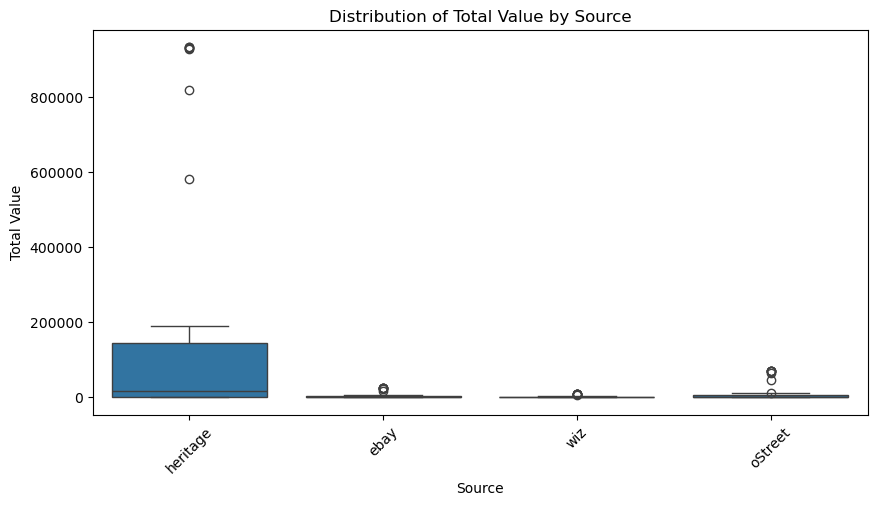

In [42]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_moneyball_melted, x='Source', y='Total Value')
plt.title("Distribution of Total Value by Source")
plt.ylabel("Total Value")
plt.xlabel("Source")
plt.xticks(rotation=45)
plt.show()

### 3. Bar Chart: Most Valuable Members
- **Purpose**: This bar chart showcases which members have contributed the highest total valuation. It helps us identify the key contributors to the dataset and their relative influence.
- **Interpretation**: There is large disparity between the total value of the top 6-7 characters with the rest of the members. This indicates that these 6-7 characters are the most popular or iconic members of the franchise.

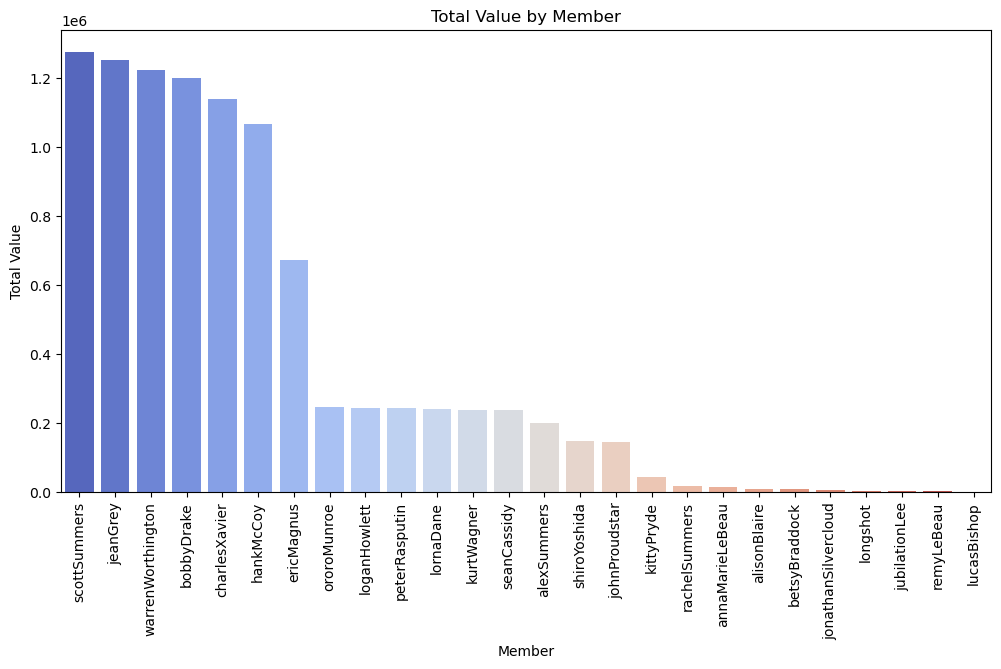

In [43]:
df_members = df_moneyball_melted.groupby('Member')['Total Value'].sum().reset_index().sort_values(by='Total Value', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(data=df_members, x='Member', y='Total Value', hue='Member', palette='coolwarm', legend=False)
plt.title("Total Value by Member")
plt.ylabel("Total Value")
plt.xlabel("Member")
plt.xticks(rotation=90)
plt.show()

### 5. Heatmap: Total Value by Source and Member
- **Purpose**: This heatmap shows how each member is valued based on the different sources and if different sources value the same characters differently. 
- **Interpretation**: This heat map indicates that Heritage has a higher average value for most members than any other source. This leads me to believe that Heritage likely has more X-Men from the 60s and more valuable decades than the other sources that may be boosting up their average. 

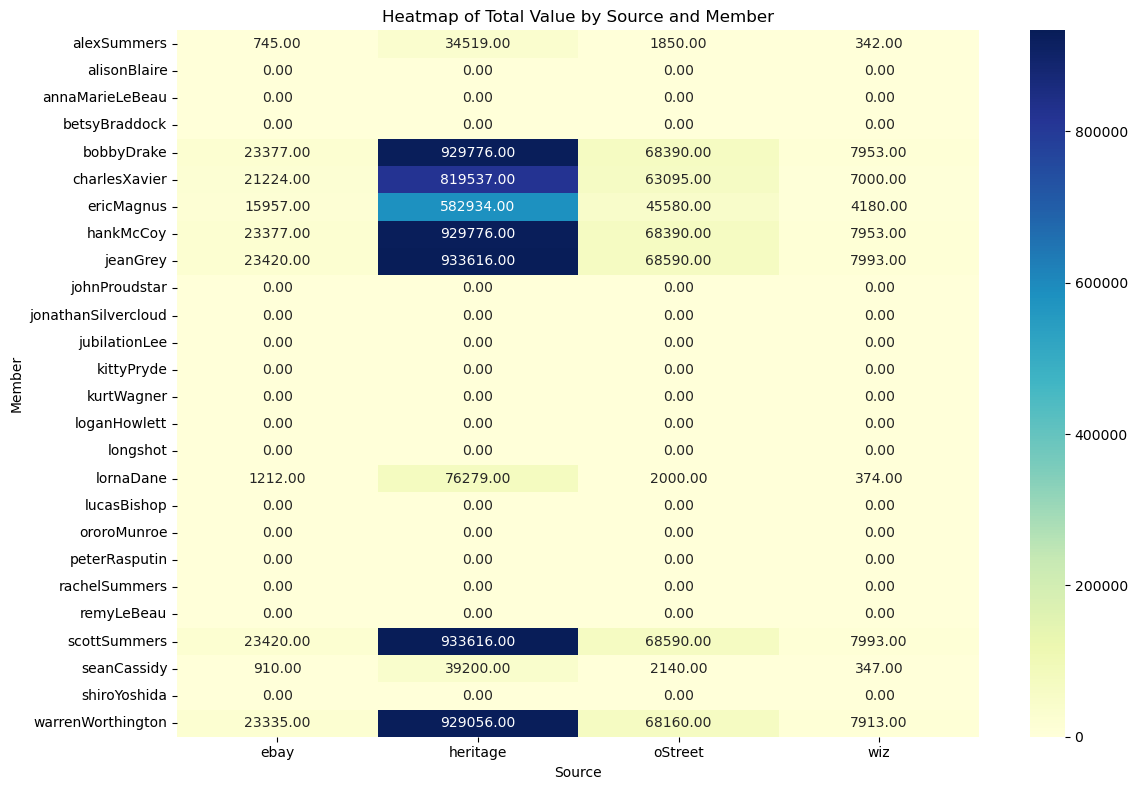

In [47]:
# Ensure 'Total Value' is numeric
df_moneyball_melted['Total Value'] = pd.to_numeric(df_moneyball_melted['Total Value'], errors='coerce')

# Pivot the table to wide format with 'Source' as columns
df_moneyball_source = df_moneyball_melted.pivot(index='Member', columns='Source', values='Total Value')

# Fill missing sources with 0
df_moneyball_source = df_moneyball_source.fillna(0)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_moneyball_source, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title("Heatmap of Total Value by Source and Member")
plt.xlabel('Source')
plt.ylabel('Member')
plt.tight_layout()
plt.show()

### 6. Heatmap: Total Value by Decade and Member
- **Purpose**: This heatmap highlights how members' valuations have evolved over different decades. It helps us identify members who consistently provide higher or lower valuations and see if their perspectives have shifted over time.
- **Interpretation**: A few select characters are valued very highly in the 60s but are then valued more similarly to their peers in later years. This indicates that these few characters combined total valuation may be skewed by abnormal valuations in the 60s

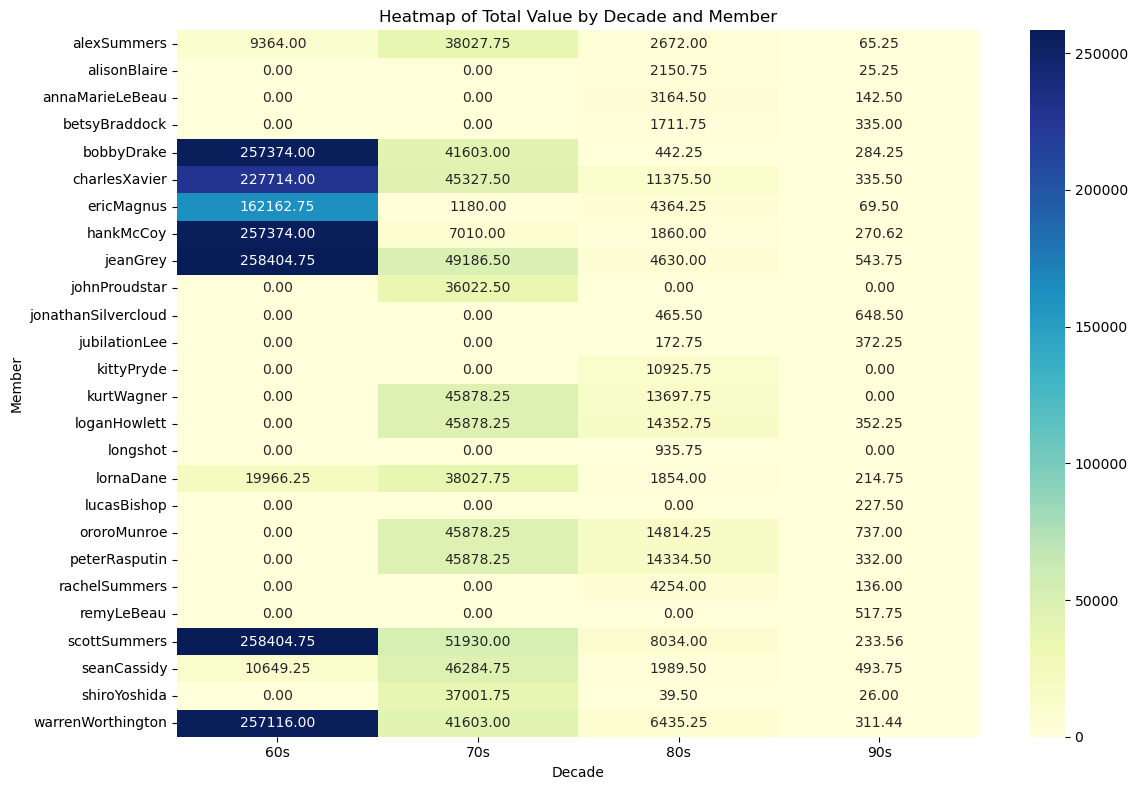

In [ ]:
# Ensure 'Total Value' is numeric, but leave other columns as is
df_moneyball['Total Value'] = pd.to_numeric(df_moneyball['Total Value'], errors='coerce')

# Pivot the table to wide format
df_moneyball_decade = df_moneyball.pivot(index='Member', columns='Decade', values='Total Value')

# Fill missing sources with 0
df_moneyball_decade = df_moneyball_decade.fillna(0)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_moneyball_decade, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title("Heatmap of Total Value by Decade and Member")
plt.xlabel('Decade')
plt.ylabel('Member')
plt.tight_layout()
plt.show()